In [288]:
import numpy as np
import pickle
import traceback

a = np.random.exponential(scale=2, size=10)
print(a)
np.mean(a), np.var(a)

[0.4174669  0.45448607 3.6201871  0.14479186 2.97857094 0.2729598
 0.30294391 0.10203436 5.03514355 0.1202485 ]


(np.float64(1.3448832982735044), np.float64(2.983615280960003))

In [289]:
def load_object(path: str):
    obj = None
    try:
        with open(path, 'rb') as f:
            obj = pickle.load(f)
    except:
        traceback.print_exc()
    assert obj is not None
    return obj

In [290]:
# vgg16_local = sum(load_object('vgg16_layer_latecy_local.rec'))
# resnet_local = sum(load_object('resnet_layer_latecy_local.rec'))
# vgg16_local, resnet_local

In [291]:
# resnet_layer_local = load_object('resnet_layer_latecy_local.rec')
# print(resnet_layer_local)
# resnet_conv_idxs = [0, 3, 6, 10, 13, 17, 20, 22, 26, 29, 33, 36, 38, 42, 45, 49, 52, 54, 58, 61]
# conv_cnt = 0
# for idx in resnet_conv_idxs:
#     conv_cnt += resnet_layer_local[idx]
# print(conv_cnt)
# print(conv_cnt / resnet_local)

Exponential Random Waiting

VGG16

In [292]:
# 1. before sending from master

lambda10 = 31.509857261813284, 23.1982130714117, 22.723433461411737, 15.708584028569977, 35.234674040827024
lambda8 = 29.005809841411708, 19.22355420876892, 21.534757788768925, 15.385755776287965, 34.79133470082703
lambda6 = 26.151395648768872, 17.824543048768927, 18.84594675876892, 15.0648009677842, 33.116198320826996
lambda4 = 23.250494138768957, 15.724390388768933, 16.0887473887689, 14.574911938832722, 30.752130758748788
lambda2 = 21.63419701876895, 13.338042048768914, 13.274832258768917, 14.364964287943698, 28.49903039874878

In [293]:
# lambda=0
lambda0 = 20.441950418768926, 13.187549258768916,  12.295036998768914, 14.087216149999984

In [294]:

vgg16_latency_determined = [11.173993277097779, 11.319978537097779, 11.373261047097778, 12.237747457097777, 14.281527107097777, 16.100179227097776]

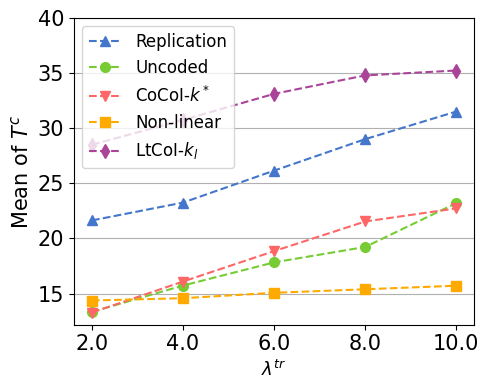

In [295]:
import matplotlib.pyplot as plt

# lambdas = [f"{i:.1f}" for i in np.arange(0, 1.1, 0.2)]
lambdas = [f"{i:.1f}" for i in np.arange(2, 11, 2)]
colors = ['#A0A0A0', '#4477CC', '#77CC33', '#FF6666', '#FFAA00', '#AA4499']
figure_size = (5, 4)
marker_size = 7

# datas = [lambda10, lambda8, lambda6, lambda4, lambda2, lambda0]
datas = [lambda10, lambda8, lambda6, lambda4, lambda2]
datas.reverse()
repetition_latency = [lambda_latency[0] for lambda_latency in datas]
uncoded_latency = [lambda_latency[1] for lambda_latency in datas]
coded_latency = [lambda_latency[2] for lambda_latency in datas]
nonlinear_latency = [lambda_latency[3] for lambda_latency in datas]
ltcoded_latency = [lambda_latency[4] for lambda_latency in datas]


plt.figure(figsize=figure_size)
plt.grid(axis='y')

plt.plot(lambdas, repetition_latency, '^--', color=colors[1], markersize=marker_size, label='Replication')
plt.plot(lambdas, uncoded_latency, 'o--', color=colors[2], markersize=marker_size, label='Uncoded')
plt.plot(lambdas, coded_latency, 'v--', color=colors[3], markersize=marker_size, label='CoCoI-$k^*$')
plt.plot(lambdas, nonlinear_latency, 's--', color=colors[4], markersize=marker_size, label='Non-linear')
plt.plot(lambdas, ltcoded_latency, 'd--', color=colors[5], markersize=marker_size, label='LtCoI-$k_l$')

plt.xlabel('$\lambda^{tr}$', fontsize=13)
plt.ylabel('Mean of $T^c$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.ylim(top=40)
plt.tight_layout()
plt.savefig('figures/vgg16_layer_latency_nonlinear.pdf', bbox_inches='tight')
plt.show()


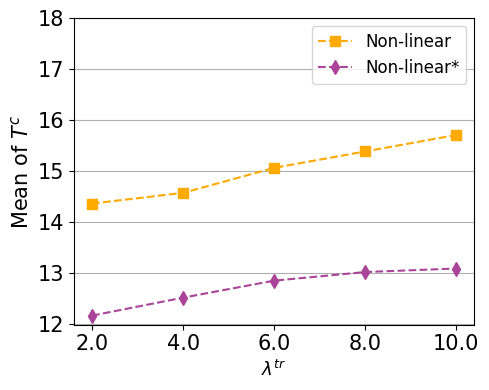

In [296]:
import matplotlib.pyplot as plt
import numpy as np

# Data Lists (lambda10 to lambda2)
# Columns: [Repetition, Uncoded, Coded(Used as Nonlinear), Nonlinear(Old), LtCoI]
lambda10 = [31.509857261813284, 23.1982130714117, 22.723433461411737, 15.708584028569977, 35.234674040827024]
lambda8 = [29.005809841411708, 19.22355420876892, 21.534757788768925, 15.385755776287965, 34.79133470082703]
lambda6 = [26.151395648768872, 17.824543048768927, 18.84594675876892, 15.0648009677842, 33.116198320826996]
lambda4 = [23.250494138768957, 15.724390388768933, 16.0887473887689, 14.574911938832722, 30.752130758748788]
lambda2 = [21.63419701876895, 13.338042048768914, 13.274832258768917, 14.364964287943698, 28.49903039874878]

# Process Lists
datas = [lambda10, lambda8, lambda6, lambda4, lambda2]
datas.reverse() # Order: lambda2, lambda4, lambda6, lambda8, lambda10

# Extract 'Nonlinear' from the 3rd column (Index 2)
nonlinear_latency = [d[3] for d in datas]

# Nonlinear-m Data (from provided text)
# Ordered for tr2, tr4, tr6, tr8, tr10
nonlinear_m_latency = [
    12.170507616921316, # tr2
    12.522389821809478, # tr4
    12.854994817588821, # tr6
    13.023365285770671, # tr8
    13.09292324847227   # tr10
]

# Plot Setup
lambdas = [f"{i:.1f}" for i in np.arange(2, 11, 2)]
colors = ['#A0A0A0', '#4477CC', '#77CC33', '#FF6666', '#FFAA00', '#AA4499']
figure_size = (5, 4)
marker_size = 7

plt.figure(figsize=figure_size)
plt.grid(axis='y')

# Plot Nonlinear (Orange, Square)
plt.plot(lambdas, nonlinear_latency, 's--', color=colors[4], markersize=marker_size, label='Non-linear')

# Plot Nonlinear-m (Purple, Diamond)
plt.plot(lambdas, nonlinear_m_latency, 'd--', color=colors[5], markersize=marker_size, label='Non-linear*')

# Labels and Ticks
plt.xlabel('$\lambda^{tr}$', fontsize=13)
plt.ylabel('Mean of $T^c$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.ylim(top=18)

# Save and Show
plt.tight_layout()
plt.savefig('figures/vgg16_layer_latency_nonlinear_nonlinear_star.pdf', bbox_inches='tight')
plt.show()

ResNet18

In [297]:
# lambda=10
# 'repetition': {'min':40.96057748794556, 'mean':59.326133668422706, 'max':71.29861092567444}
# 'uncoded': {'min':29.34839963912964, 'mean':45.280570924282074, 'max':59.23646879196167}
# 'uncoded': {'min':26.494268655776978, 'mean':43.83640158176422, 'max':62.08324670791626}


# 'coded-4': {'min':33.01043248176575, 'mean':51.94945440689723, 'max':66.13332986831665}
# 'coded-3': {'min':30.730873346328735, 'mean':49.906641105810806, 'max':65.02720737457275}
# 'coded-2': {'min':28.09462594985962, 'mean':44.4603111942609, 'max':60.24150228500366}
# 'coded-1': {'min':27.06305503845215, 'mean':42.993251979351044, 'max':58.8862566947937}
# Hybrid minimum of mean layer latency: 40.78234275182088
# 'coded-4': {'min':33.68918561935425, 'mean':53.3406949241956, 'max':68.06388926506042}
# 'coded-3': {'min':30.88403606414795, 'mean':47.46358758211136, 'max':64.02217936515808}
# 'coded-2': {'min':29.554534673690796, 'mean':45.27648995320003, 'max':63.054349184036255}
# 'coded-1': {'min':28.89814066886902, 'mean':42.901400764783226, 'max':61.72723412513733}
# Hybrid minimum of mean layer latency: 41.46996613343557
# 'coded-4': {'min':31.925284385681152, 'mean':50.405154506365456, 'max':62.130532026290894}
# 'coded-3': {'min':29.34935760498047, 'mean':45.62276738882064, 'max':60.17722535133362}
# 'coded-2': {'min':27.399470806121826, 'mean':43.379109839598335, 'max':61.998356342315674}
# 'coded-1': {'min':27.408031940460205, 'mean':40.273204684257514, 'max':59.60123634338379}
# Hybrid minimum of mean layer latency: 38.1855078538259

# 'coded-3': {'min':29.342271089553833, 'mean':47.476320008436836, 'max':64.39616060256958}
# 'coded-2': {'min':27.565308094024658, 'mean':41.858186165491745, 'max':57.96237277984619}
# 'coded-1': {'min':26.02274990081787, 'mean':38.08953764041265, 'max':56.04798936843872}
# Hybrid minimum of mean layer latency: 37.120219747225455

r_lambda10 = 59.326133668422706, 45.280570924282074, 37.46370120843251

In [298]:
# lambda=8

# 'repetition': {'min':37.290152072906494, 'mean':53.01234277089438, 'max':65.1065285205841}
# 'uncoded': {'min':25.504191637039185, 'mean':37.78051857153575, 'max':54.789894104003906}
# 'uncoded': {'min':24.984490394592285, 'mean':38.14242573579153, 'max':56.12868142127991}

# 'coded-4': {'min':30.8255774974823, 'mean':49.37812709808349, 'max':65.48980116844177}
# 'coded-3': {'min':28.873711109161377, 'mean':40.37037136157354, 'max':57.74742317199707}
# 'coded-2': {'min':26.04118514060974, 'mean':38.67539105812709, 'max':54.417619943618774}
# 'coded-1': {'min':25.510653972625732, 'mean':36.57771797974904, 'max':56.72194576263428}
# Hybrid minimum of mean layer latency: 35.208400905132294
# 'coded-4': {'min':31.015137434005737, 'mean':46.503325959046684, 'max':57.36724925041199}
# 'coded-3': {'min':28.310823917388916, 'mean':42.15755049387615, 'max':58.07741641998291}
# 'coded-2': {'min':26.851856470108032, 'mean':40.60897880792618, 'max':54.96338629722595}
# 'coded-1': {'min':25.432050704956055, 'mean':36.738790531953185, 'max':52.24366760253906}
# Hybrid minimum of mean layer latency: 36.15874403715133
# 'coded-4': {'min':29.5439395904541, 'mean':40.97508951028188, 'max':55.6312301158905}
# 'coded-3': {'min':28.62745428085327, 'mean':40.19977009296417, 'max':54.74430704116821}
# 'coded-2': {'min':25.525070667266846, 'mean':34.951915899912514, 'max':48.158191204071045}
# 'coded-1': {'min':24.403308868408203, 'mean':35.505878825982414, 'max':50.260544538497925}
# Hybrid minimum of mean layer latency: 33.62683560450872
# 'coded-3': {'min':28.425606727600098, 'mean':40.911183198293045, 'max':55.805888652801514}
# 'coded-2': {'min':26.468669176101685, 'mean':37.7475283741951, 'max':54.95421767234802}
# 'coded-1': {'min':24.38339591026306, 'mean':34.865229864915214, 'max':50.339635133743286}
# Hybrid minimum of mean layer latency: 34.457507570584625
# 'coded-3': {'min':27.74636673927307, 'mean':37.15037204821905, 'max':52.52913045883179}
# 'coded-2': {'min':25.912877321243286, 'mean':34.902190685272224, 'max':51.86260747909546}
# 'coded-1': {'min':25.32012128829956, 'mean':36.17088254292806, 'max':52.696982860565186}
# Hybrid minimum of mean layer latency: 33.659103651841484
# 'coded-3': {'min':27.96196746826172, 'mean':39.4187124768893, 'max':56.62533688545227}
# 'coded-2': {'min':25.722853422164917, 'mean':36.56455955902736, 'max':49.856924533843994}
# 'coded-1': {'min':25.105061054229736, 'mean':34.62424453099569, 'max':49.03157448768616}
# Hybrid minimum of mean layer latency: 33.57326132059097

r_lambda8 = 53.01234277089438, 38.14242573579153, 33.305183827877045

In [299]:
# lambda=6
# 'repetition': {'min':36.6429979801178, 'mean':47.17821317911148, 'max':58.473910331726074}
# 'uncoded': {'min':22.74562907218933, 'mean':32.51333109537761, 'max':48.85662579536438}
# 'uncoded': {'min':21.942052841186523, 'mean':29.91970884799957, 'max':46.96454334259033}

# 'coded-4': {'min':28.85578227043152, 'mean':39.28895713885625, 'max':53.940953493118286}
# 'coded-3': {'min':27.068914651870728, 'mean':35.305142203966774, 'max':52.6816246509552}
# 'coded-2': {'min':25.10904574394226, 'mean':34.00178974866867, 'max':49.897990465164185}
# 'coded-1': {'min':23.67393159866333, 'mean':31.20091617107392, 'max':43.61151337623596}
# Hybrid minimum of mean layer latency: 30.686168452103935
# 'coded-4': {'min':29.415966510772705, 'mean':39.28300140301387, 'max':54.03918957710266}
# 'coded-3': {'min':27.635466814041138, 'mean':34.32008488972982, 'max':48.16735243797302}
# 'coded-2': {'min':24.723103523254395, 'mean':31.67987527449926, 'max':46.52003240585327}
# 'coded-1': {'min':24.3057861328125, 'mean':30.896389822165176, 'max':43.08128786087036}
# Hybrid minimum of mean layer latency: 29.863054196039837
# 'coded-3': {'min':27.629085063934326, 'mean':34.17951242129009, 'max':49.03194308280945}
# 'coded-2': {'min':25.06956672668457, 'mean':30.48830074071884, 'max':40.91244840621948}
# 'coded-1': {'min':23.673276901245117, 'mean':28.79059596856435, 'max':38.33152985572815}
# Hybrid minimum of mean layer latency: 28.333349684874214

# 'coded-3': {'min':27.371126174926758, 'mean':34.75535567601522, 'max':49.32160472869873}
# Distributed conv idxes: [3, 6, 13, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# 'coded-2': {'min':24.8619487285614, 'mean':31.022449930508927, 'max':45.525224924087524}
# Distributed conv idxes: [3, 6, 10, 13, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# 'coded-1': {'min':23.529942750930786, 'mean':29.31320383151372, 'max':38.397050857543945}
# Distributed conv idxes: [3, 6, 10, 13, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# Results of mixed method:
# Layer 0: [1.56894177 1.40550113 1.22925115]
# Layer 3: [3.62696284 3.19379461 2.89218777]
# Layer 6: [3.58639528 3.18116089 2.80736462]
# Layer 10: [3.90845988 3.03170904 2.84103479]
# Layer 13: [3.64084103 3.05894214 3.16037607]
# Layer 17: [2.86061873 2.81787703 2.61251869]
# Layer 20: [2.02613356 1.77183535 1.45325343]
# Layer 22: [2.91019342 2.39725361 1.98833825]
# Layer 26: [1.91028446 1.55310102 1.53667263]
# Layer 29: [1.73335991 1.92011056 1.76185012]
# Layer 33: [1.61951904 1.62675526 1.37167627]
# Layer 36: [1.05885196 1.08659164 1.04235192]
# Layer 38: [1.52309922 1.32367857 1.04825219]
# Layer 42: [1.25048429 1.094489   0.94325014]
# Layer 45: [1.42880181 1.06834364 1.05016883]
# Layer 49: [0.85000587 0.85425117 0.77124689]
# Layer 52: [1.19978579 1.02684917 1.15530566]
# Layer 54: [0.55867316 0.51167969 0.46224988]
# Layer 58: [1.2053869  1.00759145 1.14502931]
# Layer 61: [1.20780269 1.08738633 1.12725504]
# Conv latency: [0.31938815116882324, 2.892187774181366, 2.8073646227518716, 2.841034789880117, 3.058942139148712, 2.6125186880429587, 1.4532534281412761, 0.3371391296386719, 1.5366726318995159, 1.7333599130312602, 1.37167626619339, 1.0423519213994343, 0.3606750965118408, 0.9432501395543417, 1.0501688321431477, 0.7712468902269999, 1.0268491705258687, 0.34396862983703613, 1.007591446240743, 1.0873863299687703]
# Hybrid minimum of mean layer latency: 28.877516627311703

r_lambda6 = 47.17821317911148, 32.51333109537761, 28.333349684874214

In [300]:
# lambda=4

# 'repetition': {'min':35.80381393432617, 'mean':41.4237426519394, 'max':53.06862735748291}
# 'uncoded': {'min':21.39474105834961, 'mean':26.20767501990001, 'max':35.061219215393066}
# 'uncoded': {'min':22.28502893447876, 'mean':27.258267283439636, 'max':34.32289505004883}


# 'coded-3': {'min':26.44007658958435, 'mean':30.43345111608506, 'max':42.18961048126221}
# 'coded-2': {'min':24.46616792678833, 'mean':27.649548212687176, 'max':38.611408948898315}
# 'coded-1': {'min':23.111972093582153, 'mean':26.081246356169384, 'max':33.245036602020264}
# Hybrid minimum of mean layer latency: 25.98059898614883

# 'coded-3': {'min':26.618136167526245, 'mean':29.544824103514355, 'max':36.597883224487305}
# Distributed conv idxes: [3, 6, 10, 13, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# 'coded-2': {'min':24.585948944091797, 'mean':27.56151042381922, 'max':35.047091007232666}
# Distributed conv idxes: [3, 6, 10, 13, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# 'coded-1': {'min':23.05089044570923, 'mean':25.55128103494644, 'max':32.01185846328735}
# Distributed conv idxes: [3, 6, 10, 13, 17, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# Results of mixed method:
# Layer 0: [1.59135081 1.40642929 1.22925651]
# Layer 3: [3.10431147 2.80963333 2.66721741]
# Layer 6: [2.91485931 2.7938445  2.56186308]
# Layer 10: [3.02633133 2.7959882  2.64417531]
# Layer 13: [2.88466952 2.84178285 2.57967315]
# Layer 17: [2.31875978 2.23302937 2.04764771]
# Layer 20: [1.61861694 1.50175107 1.31050324]
# Layer 22: [2.15268715 2.10067447 1.64142201]
# Layer 26: [1.62419198 1.63234083 1.28085363]
# Layer 29: [1.73096561 1.63319218 1.30792447]
# Layer 33: [1.21958512 1.15408327 0.96075467]
# Layer 36: [1.02366694 0.96841812 0.92733298]
# Layer 38: [1.11458687 0.89766715 0.89300478]
# Layer 42: [1.06217317 0.9592525  0.99683291]
# Layer 45: [1.07850464 0.97041965 0.88366832]
# Layer 49: [0.77150152 0.61650155 0.65041836]
# Layer 52: [1.18250612 1.00360362 1.03316637]
# Layer 54: [0.52783285 0.40341638 0.36500055]
# Layer 58: [1.17250907 0.99342096 1.01741622]
# Layer 61: [1.17000993 1.01258679 1.04017154]
# Conv latency: [0.31938815116882324, 2.667217413584391, 2.5618630846341452, 2.6441753109296164, 2.579673151175181, 2.047647714614868, 1.3105032444000244, 0.3371391296386719, 1.2808536291122437, 1.307924469312032, 0.9607546726862589, 0.9273329774538676, 0.3606750965118408, 0.9592524965604147, 0.8836683233579, 0.6165015498797098, 1.0036036173502605, 0.34396862983703613, 0.9934209585189819, 1.0125867923100789]
# Hybrid minimum of mean layer latency: 25.398641049861908

r_lambda4 = 41.4237426519394, 27.258267283439636, 25.398641049861908

In [301]:
# lambda=2

# 'repetition': {'min':34.56571412086487, 'mean':39.28375925620397, 'max':45.26474475860596}
# 'uncoded': {'min':21.130093574523926, 'mean':22.40266299247742, 'max':25.955431938171387}
# 'uncoded': {'min':21.35798978805542, 'mean':22.381004393100735, 'max':24.629002809524536}
# 'uncoded': {'min':21.55378746986389, 'mean':22.778307477633163, 'max':25.54114055633545}
# 'uncoded': {'min':21.497291088104248, 'mean':23.08936806519826, 'max':27.520140647888184}
# 'uncoded': {'min':21.684918880462646, 'mean':23.194262603918716, 'max':28.17898201942444}
# 'uncoded': {'min':21.887118339538574, 'mean':25.24927375713984, 'max':29.179664373397827}


# 'coded-3': {'min':27.128737688064575, 'mean':29.476460297902424, 'max':32.10435390472412}
# 'coded-2': {'min':25.063796997070312, 'mean':26.771470447381336, 'max':29.608050107955933}
# 'coded-1': {'min':23.28509259223938, 'mean':24.814407050609585, 'max':28.004346132278442}
# Hybrid minimum of mean layer latency: 24.72723686695099
r_lambda2 = 39.28375925620397, 24.20927375713984, 24.72723686695099

In [302]:

r_lambda0 = 36.43476657867432, 22.682096219062807, 24.238034582138066

In [303]:
resnet_latency_determined = [24.725424283981937, 25.076455023981932, 25.55128101398193, 29.313203823981937, 35.737948173981934, 41.666173214980475]
resnet_latency_determined = [24.725424283981937, 25.076455023981932, 25.55128101398193, 29.313203823981937, 35.737948173981934, 41.666173214980475]
resnet_latency_determined = [24.725424283981937, 25.076455023981932, 25.55128101398193, 29.313203823981937, 33.67663716398193, 41.666173214980475]
resnet_latency_determined = [24.725424283981937, 25.076455023981932, 25.55128101398193, 29.313203823981937, 33.67663716398193, 38.770954514980474]

repetition ratio [0.0, 0.05447501553450396, 0.20095973685768787, 0.3494722443734122, 0.5101949200305593]
uncoded ratio    [0.0, 0.1259432049423037, 0.34301141874562524, 0.5755295313037838, 0.8703812174839756]
coded ratio      [0.0, 0.027152414421535376, 0.14583565633825235, 0.34690276989220936, 0.5150783490291369]
coded/uncoded ratio [-0.021395235355145203, 0.06822246675626065, 0.12856207806703812, 0.12682051061517519, 0.17263187182248407]
[0.0018125829690518458, 0.3221860258799758, 2.782068670892283, 3.991980003895108, 3.787064044450581]


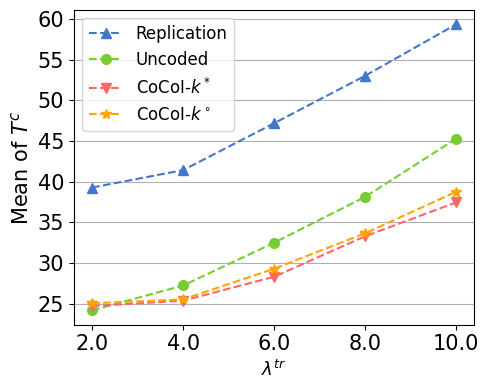

In [304]:
# r_datas = [r_lambda10, r_lambda8, r_lambda6, r_lambda4, r_lambda2, r_lambda0]
r_datas = [r_lambda10, r_lambda8, r_lambda6, r_lambda4, r_lambda2]
r_datas.reverse()
repetition_latency = [lambda_latency[0] for lambda_latency in r_datas]
uncoded_latency = [lambda_latency[1] for lambda_latency in r_datas]
coded_latency = [lambda_latency[2] for lambda_latency in r_datas]
# 受straggling effect的影响程度
repetition_ratio = [i/repetition_latency[0] - 1 for i in repetition_latency]
uncoded_ratio = [i/uncoded_latency[0] - 1 for i in uncoded_latency]
coded_ratio = [i/coded_latency[0] - 1 for i in coded_latency]
print('repetition ratio', repetition_ratio)
print('uncoded ratio   ', uncoded_ratio)
print('coded ratio     ', coded_ratio)
print('coded/uncoded ratio', [1 - t1/t2 for t1, t2 in zip(coded_latency, uncoded_latency)])

diff = [abs(t1 - t2) for t1, t2 in zip(resnet_latency_determined, coded_latency)]
print(diff)

plt.figure(figsize=figure_size)
plt.grid(axis='y')

# plt.plot(lambdas, [resnet_local]*6, '--', color=colors[0], label='local')
plt.plot(lambdas, repetition_latency, '^--', color=colors[1], markersize=marker_size, label='Replication')
plt.plot(lambdas, uncoded_latency, 'o--', color=colors[2], markersize=marker_size, label='Uncoded')
plt.plot(lambdas, coded_latency, 'v--', color=colors[3], markersize=marker_size, label='CoCoI-$k^*$')
# plt.plot(lambdas, resnet_latency_determined, '*--', color='orange', markersize=marker_size, label='CoCoI-$k^\circ$')
plt.plot(lambdas, resnet_latency_determined[1:], '*--', color='orange', markersize=marker_size, label='CoCoI-$k^\circ$')
plt.xlabel('$\lambda^{tr}$', fontsize=13)
plt.ylabel('Mean of $T^c$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('figures/resnet_inference_stra.pdf', bbox_inches='tight')
plt.show()